# NAME OF PRESENTATION

## The Confusion Matrix

The confusion matrix is a table layout that makes it easier to visualize the performance of a machine learning algorithm's classification ability.

[Error Types](https://imgs.xkcd.com/comics/error_types.png)

[Garbage Math](https://imgs.xkcd.com/comics/garbage_math.png)


${\large Recall} = \frac{TP}{TP + FN} = \frac{is🦘}{is🦘 + isn't🏭}$

${\large Precision} = \frac{TP}{TP + FP} = \frac{is🦘}{is🦘 + isn't🦘}$

${\large Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{is🦘 + is🏭}{all🦘 + all🏭} = \frac{True}{Total}$

$\begin{aligned}
&{\large Confusion Matrix} \\
&\begin{array}{|c|c|c|}
\hline
& Actual Positive & Actual Negative\\
\hline
Pred. Positive & TP & FP \\
\hline
Pred. Negative & FN & TN \\
\hline
\end{array}
&{\large Also Confusion Matrix} \\
&\begin{array}{|c|c|c|}
\hline
 & Actual 🦘 & Actual 🏭\\
\hline
Pred. 🦘 & is🦘 & isn't🦘 \\
\hline
Pred. 🏭 & isn't🏭 & is🏭 \\
\hline
\end{array}
\end{aligned}$

Fill in values for the True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN), and then run the cell (Shift+Enter).


In [7]:
True_Positive = TP = 1
False_Positive = FP = 2
True_Negative = TN = 3
False_Negative = FN = 7


from IPython.display import display, Latex

Total=sum([TP, FP, TN, FN])
recall=TP/(TP+FN)
precision=TP/(TP+FP)
accuracy=(TP+TN)/Total

display(Latex(rf'$\begin{{array}}{{|c|c|c|}} \hline \\ & Actual Positive & Actual Negative \\ \hline \\ Pred. Positive & {TP} & {FP} \\ \hline \\ Pred. Negative & {FN} & {TN} \\ \hline \end{{array}}$'))

display(Latex(rf'$Recall = \dfrac{{{TP}}}{{{TP+FN}}} = {recall}$'))

display(Latex(rf'$Precision = \dfrac{{{TP}}}{{{TP+FP}}} = {precision}$'))

display(Latex(rf'$Accuracy = \dfrac{{{TP+TN}}}{{{Total}}} = {accuracy}$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# ROC AUC

A receiver operating characteristic curve (ROC curve), is a graphical plot that illustrates the diagnostic ability of a binary classifier system as it's discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

## FPR & TPR equations
$$True Positive Rate = TPR = \frac{TP}{TP+FN} = \frac{is🦘}{is🦘 + isn't🏭}$$
$$False Positive Rate = FPR = 1 - Specificity = \frac{FP}{TN+FP} = \frac{isn't🦘}{is🏭 + isn't🦘}$$


In [8]:
True_Positive_Rate = TPR = TP/(TP+FN)
False_Positive_Rate = FPR = FP/(TN+FP)

display(Latex(rf'$True Positive Rate = \dfrac{{{TP}}}{{{TP+FN}}} = {TPR}$'))
display(Latex(rf'$False Positive Rate = \dfrac{{{FP}}}{{{TN+FP}}} = {FPR}$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Set a threshold value below and run the cell to see the resulting

In [69]:
threshold = 0.70

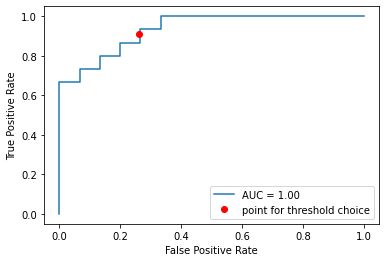

Threshold values: [1.95  0.95  0.725 0.7   0.675 0.65  0.625 0.6   0.575 0.55  0.525 0.5
 0.475 0.2  ]


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

y_truth = ['🦘', '🦘', '🦘', '🦘', '🦘', '🦘', '🦘', '🦘', '🦘', '🦘', '🏭', '🦘', '🏭', '🦘', '🏭', '🦘', '🏭', '🦘', '🏭', '🦘', '🏭', '🏭', '🏭', '🏭', '🏭', '🏭', '🏭', '🏭', '🏭', '🏭']
predictions = [ 0.95, 0.925, 0.90, 0.875, 0.85, 0.825, 0.80, 0.775, 0.750, 0.725, 0.7, 0.675, 0.65, 0.625, 0.6, 0.575, 0.55, 0.525, 0.50, 0.475, 0.45, 0.425, 0.4, 0.375, 0.35, 0.3, 0.275, 0.25, 0.225, 0.2 ]
choice_at_threshold = ['🦘' if i >= threshold else '🏭' for i in predictions]
true_kangaroo = [i == j and i == '🦘' for i, j in zip(y_truth, choice_at_threshold)]
true_factory = [i == j and i == '🏭' for i,j in zip(y_truth, choice_at_threshold)]
false_kangaroo = [i != j and i == '🦘' for i,j in zip(y_truth, choice_at_threshold)]
false_factory = [i != j and i == '🏭' for i,j in zip(y_truth, choice_at_threshold)]
true_kangaroo_ratio = np.sum(true_kangaroo)/(np.sum(true_kangaroo)+np.sum(false_factory))
false_kangaroo_ratio = np.sum(false_kangaroo)/(np.sum(true_factory)+np.sum(false_kangaroo))

fpr, tpr, thresholds = roc_curve(y_truth, predictions, pos_label='🦘')
display = RocCurveDisplay(fpr, tpr, roc_auc=True)
display.plot()
plt.plot(false_kangaroo_ratio, true_kangaroo_ratio, 'ro', label='point for threshold choice')
plt.legend()
plt.show()

print(f'Threshold values: {thresholds}')

Now set the threshold variable below to different values in the threshold values generated by the roc_curve function above, and run the cell to see how it effects the confusion matrix.

The confusion matrix will print like this:
```python
[[TP, FP]
 [FN, TN]]
```

In [28]:
# choice = ['🦘' if i > threshold else '🏭' for i in predictions]
tn, fp, fn, tp = confusion_matrix(y_truth, choice_at_threshold).ravel()
cm = np.asarray([[tp, fp], [fn, tn]])
print(f'Confusion matrix at threshold value {threshold}:')
print()
print(cm)

Confusion matrix at threshold value 0.6:

[[7 1]
 [0 3]]
